# IN3061/INM430 - Tiny DS Project 


***

** Student Name: ** Babak Hessamian

** Project Title:** The impact of individual and collective variables on negative attidues towards homosexuality in collectivist and individualistic countries - a case of India and US

***




## Application domain and datasets:

Which application domain and which datasets?

This coursework is in the domain of social psychology. We will look attitudes towards homosexuality in two countries.  The dataset is from the Spring 2019 Global Attitudes Survey by Pew Research Centre. Pew Research Centre is nonpartisan fact tank that informs the public about the issues, attitudes and trends shaping the world. The surveys for each individual country were conducted in 2019.  There are 607 variables (survey questions; few are country-specific) and 38,426 data points (respondents to the survey) in 34 countries, so the sample size for each country is approximately 1,000 responses. We pick 10 to 15 variables and 2 countries to analyse: 2,000 row x 10 or 15 columns. The dataset comes in a .sav (SPSS file) format.


## Well-motivated analytical questions:

What are your analytical questions and what is your motivation for answering them?

We aim to answer the following questions for two countries:
1.	What effect do collective variables, namely wider political and economic instability, have on attitudes towards homosexuality? 
2.	What effect do individual demographic variables, namely gender, age, education, and religiosity, have on attitudes towards homosexuality?

There is an abundance of physiological research locating the source of negative attitudes towards minorities (in our case LGB people) within the individual. On the other hand a lot research points at wider societal factors as the source of such negative attitudes. Our research will show whether negative attitudes towards homosexuality is down to societal or individual factors. This can help target either a country-wide or individual-focused response to combat discrimination. 

We have chosen Indian and the USA as our two countries due to their collective and individualistic societies respectively. 

Our hypothesis:
<br>In collectivist societies like India, collective variables, such as family values, will be better predictors of attitudes towards homosexuality than individual variables.
<br>In individualist societies like the US, individual variables of, such religiosity , will be better predictors of attitudes towards homosexuality than collective variables.

***

#### Dependent Variable(target variables)
Our dependent variable here, <b>'HOMOSEXUALITY'</b>, is as we are trying to predict the attitude towards homosexuality. The survey respondent were asked:
<br>Q. Which one of these comes closer to your opinion? Homosexuality should be accepted by society OR Homosexuality should not be accepted by society
<br>The possible answers were: 
<br>1.Homosexuality should not be accepted by society
<br>2.Homosexuality should be accepted by society
<br>3.Dont know
<br>4.Refused
<br><br>
We will omit responses with 3 and 4 so we end up with a binary answer. 

## Independent Variables(predictors)

1. What effect do collective variables, namely wider political and economic instability, have on attitudes towards homosexuality? 
<br>
Possible variable include
<br>
<br><b>COUNTRY_SATIS</b> / Q2. Overall, are you satisfied or dissatisfied with the way things are going in our country today?
<br><b>ECON_SIT</b> /Q. Now thinking about our economic situation, how would you describe the current economic situation in (survey country) – is it very good, somewhat good, somewhat bad, or very bad
<br><b>COUNTRY_SATIS</b> / Q. Overall, are you satisfied or dissatisfied with the way things are going in our country today?
<br><b>CHILDREN_BETTEROFF2</b> / Q4. When children today in (survey country) grow up, do you think they will be better off or worse off financially than their parents?
<br><b>SATISFIED_DEMOCRACY</b>  / Q5. How satisfied are you with the way democracy is working in our country – very satisfied, somewhat satisfied, not too satisfied, or not at all satisfied?
<br><b>FUTURE_CULTURE</b>  / Q12a. Thinking about the future of (survey country), please tell me whether you feel generally optimistic or generally pessimistic about the following areas. a. Our country's culture
<br><b>FUTURE_POLSY</b>S / Q12e. Thinking about the future of (survey country), please tell me whether you feel generally optimistic or generally pessimistic about the following areas. e. The way our political system works


2.	What effect do individual demographic variables, namely gender, age, education, and religiosity, have on attitudes towards homosexuality?
<br><b>BELIEVE_GOD</b> / Q30. Which of the following statements comes closest to your opinion? It is not necessary to believe in God in order to be moral and have good values OR It is necessary to believe in God in order to be moral and have good values?
<br><b>SEX</b> / Gender of respondent
<br><b>AGE</b> / How old were you at your last birthday?
<br><b>d_educ_us_2017</b> and <b>D_INCOME_INDIA</b> / What is the highest level of school you have completed or the highest degree you have received?
<br><b>D_INCOME_INDIA</b> and <b>d_income_us</b> / Would you mind telling me your households total approximate annual income, counting all wages, salaries, pensions and other incomes that come in, before taxes and other deductions? Just stop me when I get to the right category.
<br><b>RELIG_PRAYER</b> / Q66a. Please tell me whether you completely agree, mostly agree, mostly disagree or completely disagree with the following statements. a. Prayer is an important part of my daily life
<br><b>RELIG_GOD</b> / Q66b. Please tell me whether you completely agree, mostly agree, mostly disagree or completely disagree with the following statements. b. God plays an important role in my life
<br><b>D_RELIG_INDIA_A</b> and <b>d_relig_us</b> / What is your current religion, if any?

***


First of all the dataset comes in a .sav format so we need a special library to be able to read it with all it categories. 

In [2]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import scipy.stats as stats
import os 

%cd /Users/bobbyhessamian/Google Drive/MSC/Modules/Core/INM430 - Principle of Data Science/Coursework/Submission

#loading the .sav file into a dataframe
dfmain, meta = pyreadstat.read_sav('Pew Research Center Global Attitudes Spring 2019 Dataset WEB.sav', apply_value_formats=True)
type(dfmain)
type(meta)


/Users/bobbyhessamian/Google Drive/MSC/Modules/Core/INM430 - Principle of Data Science/Coursework/Submission


pyreadstat._readstat_parser.metadata_container

# Data Preparation & Derivation

We used domain knowledge to choose the following 19 independent variables out of the 600+ includes in the dataset.

In [3]:
#only a few of the variable are used here
df_orig = dfmain.loc[:,['country', 'COUNTRY_SATIS', 'ECON_SIT', 'CHILDREN_BETTEROFF2', 
                   'SATISFIED_DEMOCRACY', 'FUTURE_CULTURE', 'FUTURE_POLSYS',
                   'BELIEVE_GOD', 'SEX', 'AGE', 'd_educ_us_2017', 'D_EDUC_INDIA',
                   'd_income_us','D_INCOME_INDIA', 
                    'RELIG_PRAYER','RELIG_GOD', 'D_RELIG_INDIA_A', 'd_relig_us',
                   'HOMOSEXUALITY']]

Only interested in comparing the United States with India.

In [4]:
df = df_orig.loc[df_orig['country'].isin(['India', 'United States'])]

pd.options.mode.chained_assignment = None  # default='warn'

As .sav is omported with categories we need to drop unsued categories for every variable to avoid complication.

In [5]:
for col in df:
    df[col] = df[col].cat.remove_unused_categories()

Our dependent variable is 'HOMOSEXUALITY'. This includes the following possible answers:

In [6]:
df['HOMOSEXUALITY'].unique().tolist()

['Dont know (DO NOT READ)',
 'Homosexuality should be accepted by society',
 'Homosexuality should not be accepted by society',
 'Refused (DO NOT READ)']

We would like to build a logsitic regression model so need a binary outcome. We decide to drop the 'Refused' and 'Don't know' responses

In [7]:
df.drop(df.loc[df['HOMOSEXUALITY'] == 'Dont know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['HOMOSEXUALITY'] == 'Refused (DO NOT READ)'].index, inplace=True)

We also make the responses more concise

In [8]:
df['HOMOSEXUALITY'] = df['HOMOSEXUALITY'].map({
    'Homosexuality should be accepted by society':'Accept', 
    'Homosexuality should not be accepted by society': 'Not Accept'})

Let's check to see if there is a class-imbalance and Nans in our targer variable.

Accept        2043
Not Accept    1243
Name: HOMOSEXUALITY, dtype: int64

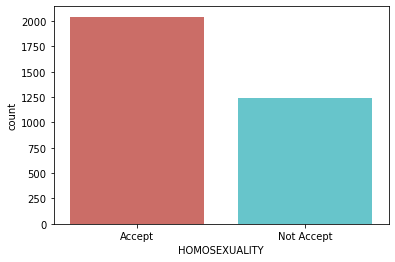

In [9]:
sns.countplot(x='HOMOSEXUALITY', data=df, palette='hls')


#We also drop NaNs from this as columns as this is our taget value/dependent variable. 
df = df[df['HOMOSEXUALITY'].notna()]

df['HOMOSEXUALITY'].value_counts() 

No class imbalance which is good. We had a look at box plots for different variables to identify outliers and AGE stuck out. 

<AxesSubplot:title={'center':'AGE'}, xlabel='HOMOSEXUALITY'>

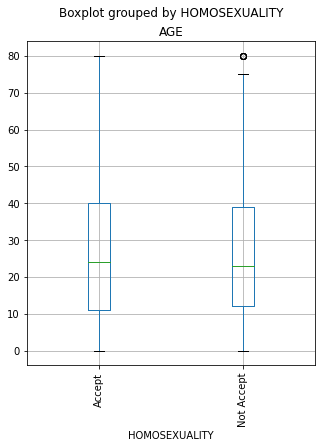

In [10]:
#Converting AGE from catgorical to numeric so we can plot a boxplot and identify outliers. 
df.loc[:,'AGE'] = df.loc[:,'AGE'].cat.codes
df.loc[:,'AGE'] = df.loc[:,'AGE'].astype(np.int64)

df.boxplot('AGE','HOMOSEXUALITY',rot = 90, figsize=(5,6))

Because we converted form categories some of the don't knows are interpreted as 0. We need to fix this.


In [11]:
# Removing all observations where AGE is belowe 18
index_to_remove = df[df['AGE'] <= 18].index
df.drop(index_to_remove, inplace=True)

# Create a new variable form the the binned values of AGE to make things easier for interpreting results later
df['AGE_Group'] = pd.cut(df['AGE'],[18,29,49,69,100], labels=['18-29', '30-49', '50-69', '70+'])

# Drop the original AGE column
df = df.drop(['AGE'], axis = 1) 

We have a few variables where the response to the survey question was on a scale. These are oridinal variables and we code them from 0 to 4 before. 

But before that we need to drop the observations with none-asnwers to the questions as they are completely useless for our study.

In [12]:
df.drop(df.loc[df['RELIG_GOD'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['RELIG_GOD'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['RELIG_PRAYER'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['RELIG_PRAYER'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['SATISFIED_DEMOCRACY'] == 'Dont know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['SATISFIED_DEMOCRACY'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['CHILDREN_BETTEROFF2'] == 'Dont know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['CHILDREN_BETTEROFF2'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['ECON_SIT'] == 'Dont know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['ECON_SIT'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['d_educ_us_2017'] == '(VOL) Refused'].index, inplace=True)
df.drop(df.loc[df['d_educ_us_2017'] == "(VOL) Don't know"].index, inplace=True)

df.drop(df.loc[df['D_EDUC_INDIA'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['d_income_us'] == '(VOL) Refused'].index, inplace=True)
df.drop(df.loc[df['d_income_us'] == "(VOL) Don't know"].index, inplace=True)

df.drop(df.loc[df['D_INCOME_INDIA'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['D_INCOME_INDIA'] == 'Refused (DO NOT READ)'].index, inplace=True)

In [13]:
df['RELIG_GOD'] = df['RELIG_GOD'].map({
    'Mostly agree':4, 
    'Completely agree':3, 
    'Mostly disagree':2, 
    'Completely disagree':1})

df['RELIG_PRAYER'] = df['RELIG_PRAYER'].map({
    'Mostly agree':4, 
    'Completely agree':3, 
    'Mostly disagree':2, 
    'Completely disagree':1})

df['SATISFIED_DEMOCRACY'] = df['SATISFIED_DEMOCRACY'].map({
    'Somewhat satisfied':4, 
    'Not too satisfied':3, 
    'Very satisfied':2, 
    'Not at all satisfied':1})

df['CHILDREN_BETTEROFF2'] = df['CHILDREN_BETTEROFF2'].map({
    'Better off':3,  
    'Worse off':1, 
    'Same (DO NOT READ)':2})

df['ECON_SIT'] = df['ECON_SIT'].map({
    'Somewhat good':4, 
    'Very good':3, 
    'Very bad':1,
    'Same (DO NOT READ)':2})

print("ECON_SIT \n", df['ECON_SIT'].unique())
print("CHILDREN_BETTEROFF2 \n",df['CHILDREN_BETTEROFF2'].unique())
print("SATISFIED_DEMOCRACY \n",df['SATISFIED_DEMOCRACY'].unique())
print("ELIG_PRAYER \n",df['RELIG_PRAYER'].unique())
print("RELIG_GOD \n",df['RELIG_GOD'].unique())

ECON_SIT 
 [ 4.  3. nan  1.]
CHILDREN_BETTEROFF2 
 [3. 1. 2.]
SATISFIED_DEMOCRACY 
 [4. 2. 3. 1.]
ELIG_PRAYER 
 [3. 4. 1. 2.]
RELIG_GOD 
 [3. 4. 1. 2.]


There are Nans! We will deal with these later. 


<br>For education and income, we have different variables for Indian and the US. This is a problem when it comes to fitting models or doing other analysis because where there is an entry for Educaiton in the US, there is NaN for Education in India, and viceversa. 
<br><br>Also, the survey responses to questions on education and income are country sepcific. For instance the income levels are in USD in the US and Rupees in India. 
<br><br>To address these two problems we create two new variables: INCOME and EDUCATION
<br>We use domain knowlegde to re-bin the current values into bins that will be interprerable across the two countries. For instance a range between low and high.

In [14]:
#Rebinning the values:

df['d_educ_us_2017'] = df['d_educ_us_2017'].map({
    "Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)": 'Univeristy Degree',
    "Postgraduate or professional degree, including master's, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD, gr": 'PostGrad Degree',
    'Some college, no degree (includes some community college)': 'College Degree',
    'Two year associate degree from a college or university': 'Diploma',
    'Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)':'Higher Degree',
    'High school incomplete (Grades 9-11 or Grade 12 with NO diploma)': 'High School',
    'Less than high school (Grades 1-8 or no formal schooling)': 'Some Education'})
    
df['D_EDUC_INDIA'] = df['D_EDUC_INDIA'].map({
    'Illiterate': 'No Education',
    'Literate but no formal schooling':'No Education',
    'Primary Education (primary certificate, up to 5th standard)': 'Some Education',
    'High School': 'High School',
    'Upper Primary (Upper Primary Certificate, up to 8th standard)':'High School',
    'Senior Secondary / intermediate (Senior Secondary School Leaving Certificate)': 'College Degree',
    'Bachelor Degree (university 1st), (B.E., B.Tech, MBBS, or LLB, etc.)': 'University Degree',
    'Master Degree (university 2nd) (M.E. M.Tech, MD, LLM, etc.), or Post graduate diploma': 'PostGrad Degree',
    'Any professional training (General nursing and Midwifery (GNM); Junior teachers training (diploma))': 'Diploma',
    'Any technical or industrial training (diploma or certificate)': 'Diploma',
    'Doctor (Tertiary 2nd) (M.Phil, PhD)': 'Higher Degree'})
    

df['d_income_us'] = df['d_income_us'].map({
    'nan': 'No Answer',
    '$50,001 to $75,000': 'High',
    'More than $150,000': 'Very High',
    '$100,001 to $150,000': 'Very High',
    '$10,001 to $20,000':'Very Low',
    '$20,001 to $30,000': 'Low',
    '$30,001 to $40,000': 'Low',
    '$10,000 or less': 'Very Low',
    '$40,001 to $50,000': 'Medium',
    '$75,001 to $100,000': 'High'})
    
    
df['D_INCOME_INDIA'] = df['D_INCOME_INDIA'].map({
    'nan':'No Answer',
    'Rs. 1,501 to Rs. 3,500' : 'Very Low',
    'Rs. 3,501 to Rs. 5,500': 'Very Low',
    'Up to Rs. 1,500 per month': 'Very Low',
    'Rs. 6,501 to Rs. 8,500': 'Very Low',
    'Rs. 20,001 to Rs. 40,000': 'Very High',
    'Rs. 15,001 to Rs. 20,000':'High',
    'Rs. 5,501 to Rs. 6,500': 'Low',
    'Rs. 10,001 to Rs. 15,000': 'Medium',
    'Rs. 40,001 and above': 'Very High',
    'Rs. 8,501 to Rs. 10,000':'Low'})

Creating two new variables for EDUCATION and INCOME by combining the two US and India columns.

In [15]:

df["EDUCATION"] = df["d_educ_us_2017"].fillna('') + df["D_EDUC_INDIA"].fillna('')
df["INCOME"] = df["d_income_us"].fillna('') + df["D_INCOME_INDIA"].fillna('')

# Dropping the original seperate education and income columns.
df = df.drop(['d_educ_us_2017', 'D_EDUC_INDIA', 'd_income_us', 'D_INCOME_INDIA'], axis = 1) 

There are also two seperate variables for religion for either country. We combine these two as well. We will deal with the content later. 

In [16]:
df['D_RELIG_INDIA_A'] = df['D_RELIG_INDIA_A'].astype(np.str)
df['d_relig_us'] = df['d_relig_us'].astype(np.str)

df["RELIGION"] = df['D_RELIG_INDIA_A'].fillna('') + df['d_relig_us'].fillna('')
df = df.drop(['D_RELIG_INDIA_A', 'd_relig_us'], axis = 1)

 A reminder of the current shape of the dataframe.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 11278 to 38424
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              1682 non-null   category
 1   COUNTRY_SATIS        1682 non-null   category
 2   ECON_SIT             1376 non-null   float64 
 3   CHILDREN_BETTEROFF2  1682 non-null   float64 
 4   SATISFIED_DEMOCRACY  1682 non-null   float64 
 5   FUTURE_CULTURE       1682 non-null   category
 6   FUTURE_POLSYS        1682 non-null   category
 7   BELIEVE_GOD          1682 non-null   category
 8   SEX                  1682 non-null   category
 9   RELIG_PRAYER         1682 non-null   float64 
 10  RELIG_GOD            1682 non-null   float64 
 11  HOMOSEXUALITY        1682 non-null   object  
 12  AGE_Group            1682 non-null   category
 13  EDUCATION            1682 non-null   object  
 14  INCOME               1682 non-null   object  
 15  RELIGION        

<br><br>Since we have numeric columns let's have a look at the colleration matrix for these and see if there is any issue we need to address. 

<AxesSubplot:>

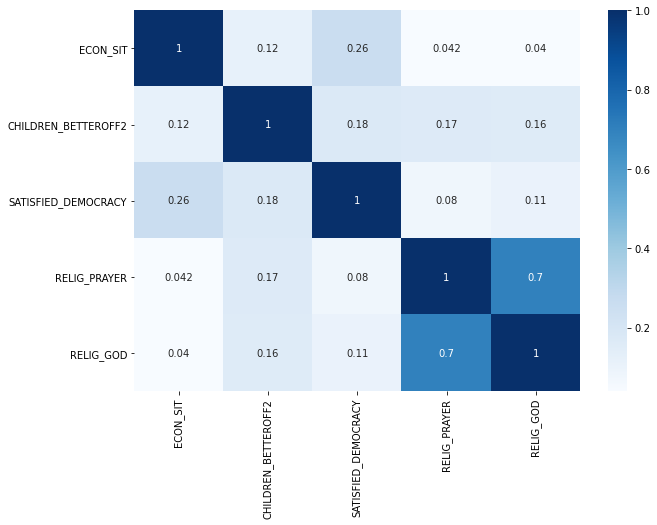

In [18]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(method='pearson'), cmap="Blues", annot=True)

RELIG_PRAYER and RELIF_GOD are too closely correlated so we drop one of them.

In [19]:
df = df.drop(['RELIG_PRAYER'], 1)

Dropping more observations with non-answers like 'Don't know' or 'Refused. WE checked histograms of all variables and observed that the number of people who responded with non-values was very few. 


In [20]:

df.drop(df.loc[df['BELIEVE_GOD'] == 'Don’t know'].index, inplace=True)
df.drop(df.loc[df['BELIEVE_GOD'] == 'Refused'].index, inplace=True)

df.drop(df.loc[df['BELIEVE_GOD'] == 'Don’t know'].index, inplace=True)
df.drop(df.loc[df['BELIEVE_GOD'] == 'Refused'].index, inplace=True)

df.drop(df.loc[df['COUNTRY_SATIS'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['COUNTRY_SATIS'] == 'Refused (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['FUTURE_CULTURE'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['FUTURE_CULTURE'] == 'Refused (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['FUTURE_CULTURE'] == 'Neither (DO NOT READ)'].index, inplace=True)

df.drop(df.loc[df['FUTURE_POLSYS'] == 'Don’t know (DO NOT READ)'].index, inplace=True)
df.drop(df.loc[df['FUTURE_POLSYS'] == 'Refused (DO NOT READ)'].index, inplace=True)


# Dealing with missing values

We faced problems dealing with category data types. So we convert all category types to object.

In [21]:
for col in ['country','COUNTRY_SATIS','FUTURE_CULTURE','FUTURE_POLSYS','BELIEVE_GOD','SEX',
                'EDUCATION','INCOME','RELIGION','AGE_Group']:
    df[col] = df[col].astype(np.str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 11278 to 38424
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1579 non-null   object 
 1   COUNTRY_SATIS        1579 non-null   object 
 2   ECON_SIT             1292 non-null   float64
 3   CHILDREN_BETTEROFF2  1579 non-null   float64
 4   SATISFIED_DEMOCRACY  1579 non-null   float64
 5   FUTURE_CULTURE       1579 non-null   object 
 6   FUTURE_POLSYS        1579 non-null   object 
 7   BELIEVE_GOD          1579 non-null   object 
 8   SEX                  1579 non-null   object 
 9   RELIG_GOD            1579 non-null   float64
 10  HOMOSEXUALITY        1579 non-null   object 
 11  AGE_Group            1579 non-null   object 
 12  EDUCATION            1579 non-null   object 
 13  INCOME               1579 non-null   object 
 14  RELIGION             1579 non-null   object 
dtypes: float64(4), object(11)
memory 

<br><br>Now let's have a look at missing values. 

In [22]:
# Now let's look at NaNs
print(df.isnull().sum())

country                  0
COUNTRY_SATIS            0
ECON_SIT               287
CHILDREN_BETTEROFF2      0
SATISFIED_DEMOCRACY      0
FUTURE_CULTURE           0
FUTURE_POLSYS            0
BELIEVE_GOD              0
SEX                      0
RELIG_GOD                0
HOMOSEXUALITY            0
AGE_Group                0
EDUCATION                0
INCOME                   0
RELIGION                 0
dtype: int64


<br><br><br> We drop the observations where there are missing values becasue of the nature of the variables. Here is the survey quesions for this variables:
<br><br><b>ECON_SIT</b> /Q. Now thinking about our economic situation, how would you describe the current economic situation in (survey country) – is it very good, somewhat good, somewhat bad, or very bad
<br><br> The answer to this questions is not somehting we can geuss and impute, becasue they are objective beliefs. 


In [23]:
df = df[df['ECON_SIT'].notna()]

print(df.isnull().sum())
df.shape

country                0
COUNTRY_SATIS          0
ECON_SIT               0
CHILDREN_BETTEROFF2    0
SATISFIED_DEMOCRACY    0
FUTURE_CULTURE         0
FUTURE_POLSYS          0
BELIEVE_GOD            0
SEX                    0
RELIG_GOD              0
HOMOSEXUALITY          0
AGE_Group              0
EDUCATION              0
INCOME                 0
RELIGION               0
dtype: int64


(1292, 15)

<br><br>Let's plot all the categorical variable to see their distribution to get an idea of our dataset after all the cleaning we did. 


/Users/bobbyhessamian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


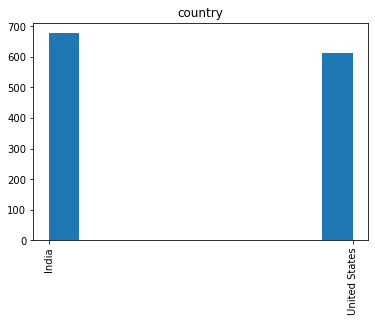

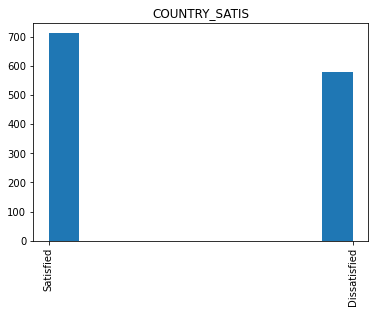

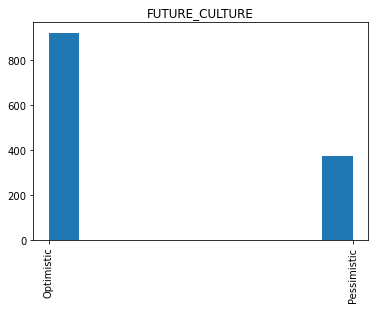

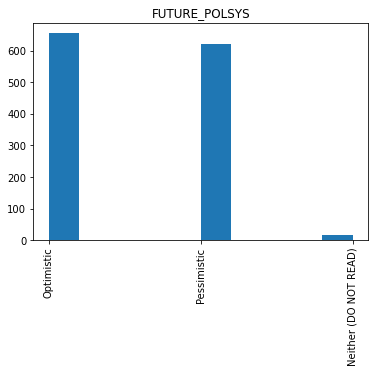

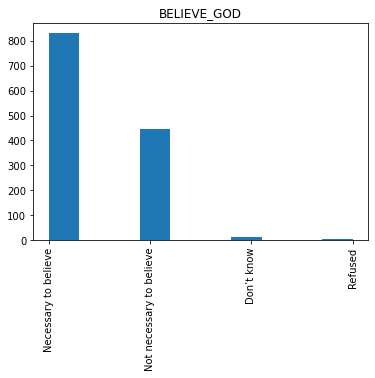

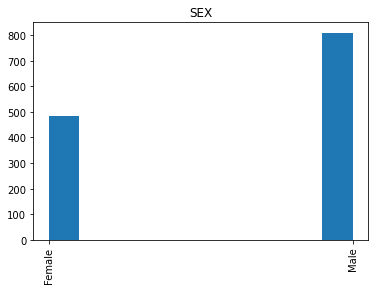

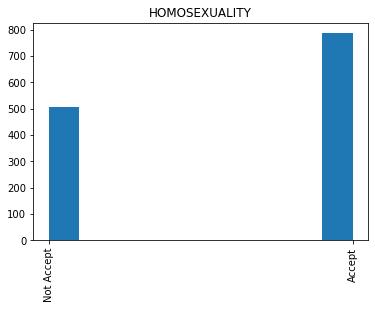

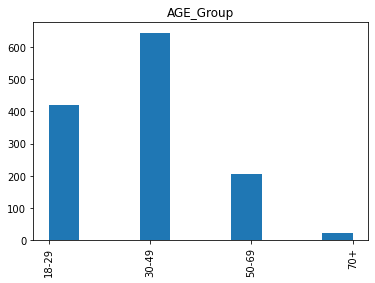

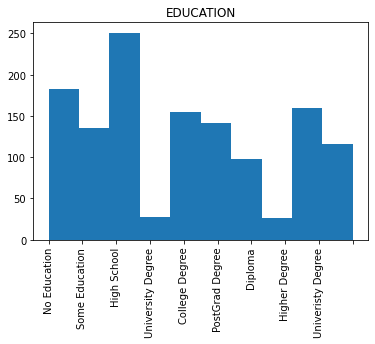

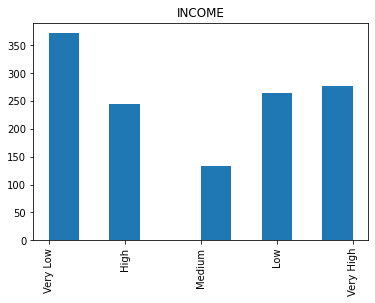

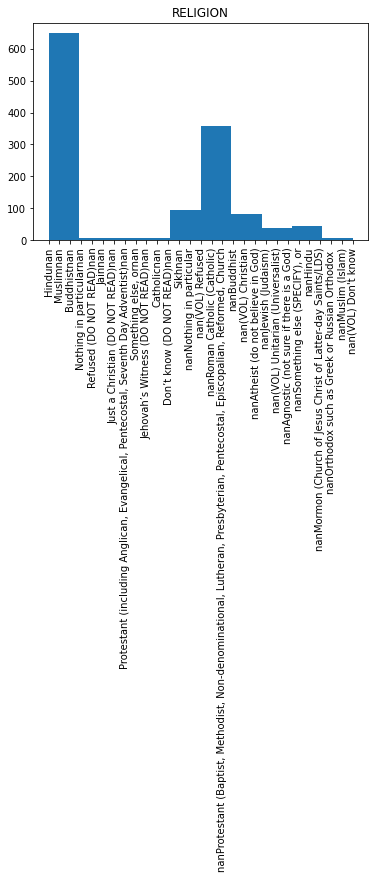

In [24]:
# Before we do that, let's shorten the answers to one of the survey questions, this will help with plotting more compact histograme.
df['BELIEVE_GOD'] = df['BELIEVE_GOD'].map({
    'It is necessary to believe in God in order to be moral and have good values': 'Necessary to believe',
    'It is not necessary to believe in God in order to be moral and have good values': 'Not necessary to believe',
    'Don’t know (DO NOT READ)': 'Don’t know',
    'Refused (DO NOT READ)': 'Refused'})


# Plotting a histogram for every caategorical variable.
df_object=df.select_dtypes(include='object')

fig = plt.figure()
for i, col in enumerate(df_object.columns):
    plt.figure(i)
    plt.hist(df_object[col])
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

The values for RELIGION are all over the place becasue we combined religion for US and India. Let's see:

Dropping more-non answers...

In [25]:
df.drop(df.loc[df['RELIGION'] == 'nan(VOL) Refused'].index, inplace=True)
df.drop(df.loc[df['RELIGION'] == "nan(VOL)\xa0Don't know"].index, inplace=True)
df.drop(df.loc[df['RELIGION'] == 'Don’t know (DO NOT READ)nan'].index, inplace=True)
df.drop(df.loc[df['RELIGION'] == 'Refused (DO NOT READ)nan'].index, inplace=True)

<br><br> There are many repeats as a result of the combining. We group them together under more consice umbrellas. This is based on information that is common knowledge about different religions.

In [26]:
to_map = {'Hindunan':'Hindu',
          'nanProtestant (Baptist, Methodist, Non-denominational, Lutheran, Presbyterian, Pentecostal, Episcopalian, Reformed, Church': 'Protestant',
          'nanRoman Catholic (Catholic)': 'Catholic',
          'nanNothing in particular': 'Nothing in Particular',
          'nan(VOL)\xa0Christian': 'Christian',
          'Muslimnan':'Muslim',
          'nanSomething else (SPECIFY), or': 'Other',
          'nanAgnostic (not sure if there is a God)': 'Agnostic',
          'nanJewish (Judaism)': 'Jewish',
          'nanMormon (Church of Jesus Christ of Latter-day Saints/LDS)': 'Mormon',
          'nanAtheist (do not believe in God)': 'Atheist',
          'Sikhnan': 'Sikh',
          'Buddhistnan': 'Buddhist',
          'nanHindu': 'Hindu',
          'Catholicnan': 'Catholic',
          'nanMuslim (Islam)': 'Muslim',
          'nanOrthodox such as Greek or Russian Orthodox\xa0': 'Catholic',
          'nanBuddhist': 'Buddhist',
          'Jainnan': 'Hindu',
          'Protestant (including Anglican, Evangelical, Pentecostal, Seventh Day Adventist)nan': 'Protestant',
          'Something else, ornan': 'Other',
          'Nothing in particularnan': 'Nothing in Particular',
          'Just a Christian (DO NOT READ)nan': 'Christian',
          'nan(VOL)\xa0Unitarian (Universalist)': 'nan(VOL) Unitarian (Universalist)',
          'Jehovah’s Witness (DO NOT READ)nan': 'Jehovah’s Witness (DO NOT READ)nan'}

df.RELIGION = df.RELIGION.map(to_map)

There are two outliers with 1 observation for each. We drop these observations from the dataframe.

In [27]:
df.drop(df.loc[df['RELIGION'] == 'nan(VOL) Unitarian (Universalist)'].index, inplace=True)
df.drop(df.loc[df['RELIGION'] == 'Jehovah’s Witness (DO NOT READ)nan'].index, inplace=True)

<br><br> Let's pause the analysis and have a look at few visualisations to gain insight into our data and help our narrative for the report.
<br><br> First, we look at the split between people who are accepting of homosexuality and pepole who are not accepting of homosexuality in the two countries. 

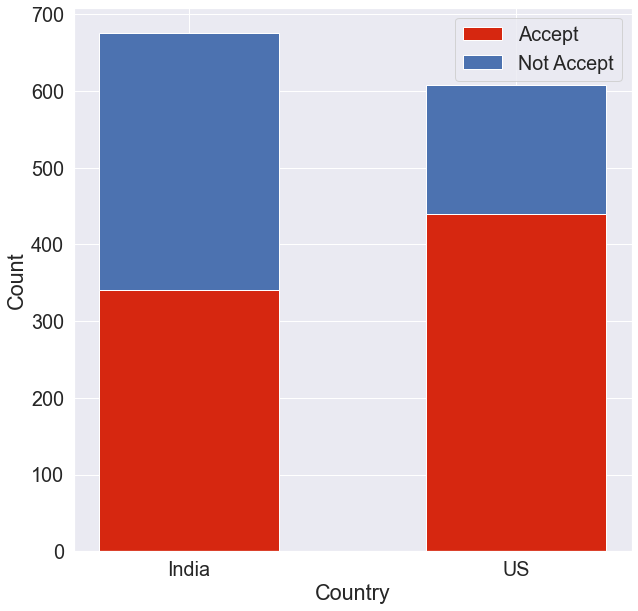

In [28]:
#https://codingdisciple.com/chi-squared-python.html

table_test = pd.crosstab(df['HOMOSEXUALITY'],df['country'])
acceptcount = table_test.iloc[0][0:2].values
notacceptcount = table_test.iloc[1][0:2].values

fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.8)
categories = ['India', 'US']
p1 = plt.bar(categories, acceptcount, 0.55, color='#d62710')
p2 = plt.bar(categories, notacceptcount, 0.55, bottom=acceptcount)
plt.legend((p1[0], p2[0]), ('Accept', 'Not Accept'))
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()


<br><br>Now we look at the split between people who are accepting of homosexuality and pepole who are not accepting of homosexuality by age group. 

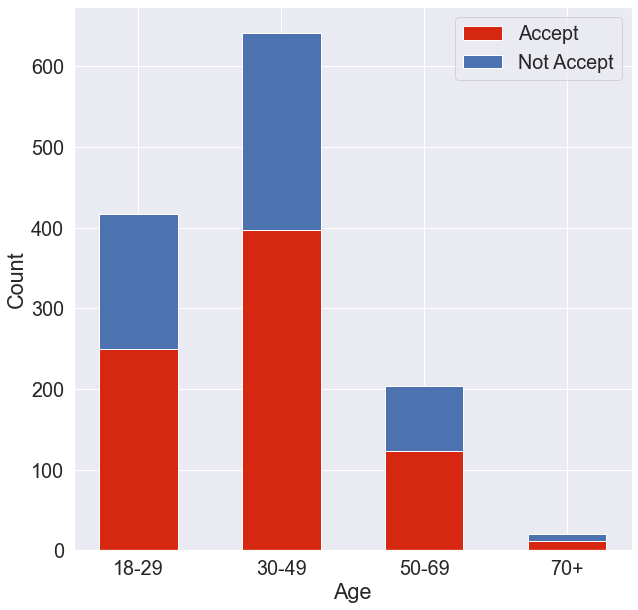

In [29]:
table_test = pd.crosstab(df['HOMOSEXUALITY'],df['AGE_Group'])
acceptcount = table_test.iloc[0][0:4].values
notacceptcount = table_test.iloc[1][0:4].values

fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.8)
categories = ['18-29', '30-49', '50-69', '70+']
p1 = plt.bar(categories, acceptcount, 0.55, color='#d62710')
p2 = plt.bar(categories, notacceptcount, 0.55, bottom=acceptcount)
plt.legend((p1[0], p2[0]), ('Accept', 'Not Accept'))
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

<br><br>Now we look at the split between people who are accepting of homosexuality and pepole who are not accepting of homosexuality by income. 

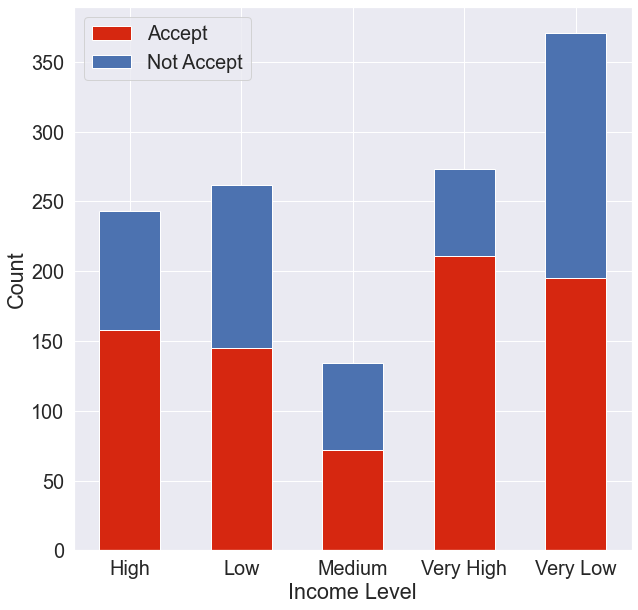

In [30]:
table_test = pd.crosstab(df['HOMOSEXUALITY'],df['INCOME'])
acceptcount = table_test.iloc[0][0:5].values
notacceptcount = table_test.iloc[1][0:5].values

fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.8)
categories = ['High', 'Low', 'Medium', 'Very High', 'Very Low']
p1 = plt.bar(categories, acceptcount, 0.55, color='#d62710')
p2 = plt.bar(categories, notacceptcount, 0.55, bottom=acceptcount)
plt.legend((p1[0], p2[0]), ('Accept', 'Not Accept'))
plt.xlabel('Income Level')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

<br><br> An finally we look at the split between people who are accepting of homosexuality and pepole who are not accepting of homosexuality grouped by religion.

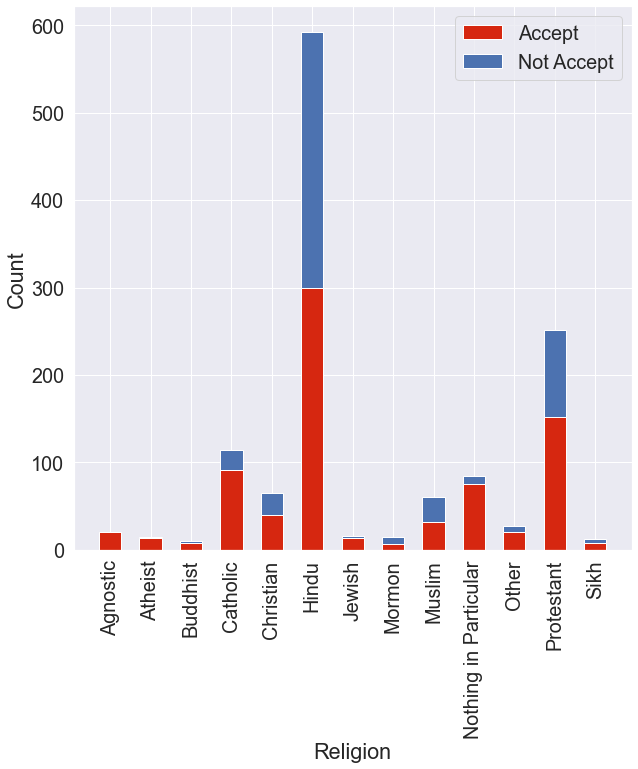

In [31]:
table_test_re = pd.crosstab(df['HOMOSEXUALITY'],df['RELIGION'])
acceptcount = table_test_re.iloc[0][0:13].values
notacceptcount = table_test_re.iloc[1][0:13].values

fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.8)
categories = ['Agnostic', 'Atheist', 'Buddhist', 'Catholic', 'Christian',  
              'Hindu','Jewish', 'Mormon', 'Muslim', 'Nothing in Particular', 'Other',
             'Protestant', 'Sikh' ]
p1 = plt.bar(categories, acceptcount, 0.55, color='#d62710')
p2 = plt.bar(categories, notacceptcount, 0.55, bottom=acceptcount)
plt.legend((p1[0], p2[0]), ('Accept', 'Not Accept'))
plt.xlabel('Religion')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Feature Selection

We are now going to perform a chi square test and calculate the crame'rs effect for our categorical variables. This will hep us decide which features we are going to keep for our model building.

In [32]:
X_chi2 = df.drop('HOMOSEXUALITY',1)
y_chi2 = df.HOMOSEXUALITY

# https://pythonfordatascienceorg.wordpress.com/chi-square-python/
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
# https://towardsdatascience.com/a-definitive-guide-to-effect-size-9bc93f00db86

from scipy import stats

#This is one big for loop that calcualtes everything we need for each categorical variable so we can feature select.

#Calculate chi-square, p value, and determine degrees of freedom automatically.
for series in X_chi2:
    nl = "\n"
    
    crosstab = pd.crosstab(X_chi2[f"{series}"], y_chi2)
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab, correction=False)
    
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    
# Calculate Cramer's effect 
    n = len(X_chi2[f"{series}"])
    phi = np.sqrt(chi2 / (n * (np.min(crosstab.shape) - 1)))
    print("Cramer's V: ", phi)
    if phi <= 0.2:
        print('Small Effect Size', nl)
    elif 0.2 < phi <= 0.6:
        print('Medium Effect Size', nl)
    elif 0.6 < phi:
        print('Large Effect Size', nl)
#The most common interpretation of the magnitude of the Cramér’s V is as follows:
#Small Effect Size: V ≤ 0.2
#Medium Effect Size: 0.2 < V ≤ 0.6
#Large Effect Size: 0.6 < V
    
# Interpret test-statistic - as an alternative we use this method to calculate the chi2 value again 
# and print dependent or independent to help our decision making.
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof) #
    print('critical=%.3f, stat=%.3f' % (critical, chi2))
    if abs(chi2) >= critical:
        print(' Dependent')
    else:
        print(' Independent')
        
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print(' Dependent') # (reject H0)
    else:
        print(' Independent') # (fail to reject H0)
    print('-----------------------------------------------------------')
    


HOMOSEXUALITY  Accept  Not Accept
country                          
India             341         334
United States     440         168 

Chi2 value= 64.11774878029541
p-value= 1.1720093149063587e-15
Degrees of freedom= 1

Cramer's V:  0.22355058186072616
Medium Effect Size 

critical=3.841, stat=64.118
 Dependent
significance=0.050, p=0.000
 Dependent
-----------------------------------------------------------
HOMOSEXUALITY  Accept  Not Accept
COUNTRY_SATIS                    
Dissatisfied      362         212
Satisfied         419         290 

Chi2 value= 2.09781115124742
p-value= 0.1475101752661267
Degrees of freedom= 1

Cramer's V:  0.040436156305314115
Small Effect Size 

critical=3.841, stat=2.098
 Independent
significance=0.050, p=0.148
 Independent
-----------------------------------------------------------
HOMOSEXUALITY  Accept  Not Accept
ECON_SIT                         
1.0                94          38
3.0               242         183
4.0               445         281 



<br><br>Based on the chi square test above and Cramer's values we keep the following features:
<br>country --- p-value= 2.368183932186282e-19 : p value very very low, so we may split the data set into two by countries to fit our models seperately
<br>ECON_SIT p-value= 0.024665476816673505
<br>CHILDREN_BETTEROFF2 p-value= 0.003458335578378539
<br>SATISFIED_DEMOCRACY  p-value= 0.0017840108008246392
<br>BELIEVE_GOD --- p-value= 7.824979514078219e-19
<br>RELIG_GOD p-value= 1.8854284849764997e-15
<br>EDUCATION p-value= 5.826659724614825e-11
<br>INCOME p-value= 1.6966502041974891e-09
<br>RELIGION p-value= 2.331779628810007e-19
<br><br>
<br>And we drop the following:
<br>COUNTRY_SATIS p-value= 0.12076313212420783
<br>FUTURE_CULTURE  p-value= 0.4984438296359013
<br>FUTURE_POLSYS  p-value= 0.17325247030320995
<br>SEX   p-value= 0.0884191849422171
<br>AGE_Group p-value= 0.7574246613424449

<br><br>We also decide to drop BELIEVE_GOD. This is a domain knowledge decision. The questiosn asked in teh survey for BELIEVE_GOD is very similar to 
RELIG_GOD.
<br>
<br><b>BELIEVE_GOD</b> / Q30. Which of the following statements comes closest to your opinion? It is not necessary to believe in God in order to be moral and have good values OR It is necessary to believe in God in order to be moral and have good values?
<br><b>RELIG_GOD</b> / Q66b. Please tell me whether you completely agree, mostly agree, mostly disagree or completely disagree with the following statements. b. God plays an important role in my life

In [33]:
# We made a copy here to be able to go back and use df for more visualisaiton to put in the report. 
df_to_analyse = df.copy()

# We drop the features mentioned above.
df_to_analyse = df_to_analyse.drop(['COUNTRY_SATIS','FUTURE_CULTURE','FUTURE_POLSYS','SEX','AGE_Group', 'BELIEVE_GOD'],axis=1)

# Model Building

Now we have our features. Let's build a model to find out the most important features in predicting our outcome, which is whether a survey respondent's attitude is postivie or negative towards homosexuality. 

In [34]:
# We have made copies again to be able to iterate from one step to another while we were building and testing the models.
dfA = df_to_analyse.copy()

We dummy code our categorical variables and assign 0 and 1 to our target variable. 

In [35]:
dfA['HOMOSEXUALITY'] = dfA['HOMOSEXUALITY'].map({'Accept':1,'Not Accept':0})
dfA['HOMOSEXUALITY'].unique()

todummy_list = ['country','EDUCATION','INCOME','RELIGION']

def dummy_dfA(dfA, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(dfA[x], prefix=x, dummy_na=False)
        dfA = dfA.drop(x,1)
        dfA = pd.concat([dfA, dummies], axis = 1)
    return dfA
dfAD = dummy_dfA(dfA, todummy_list)

We create dataframe X for our predictors and y for our target variable.

In [36]:
X = dfAD.drop('HOMOSEXUALITY',1)
y = dfAD.HOMOSEXUALITY

Let's plot a correlation matrix to check for any highly correlated varibles. We are assuming the variables are independent as our method of choice is Logistic Regression. 

<AxesSubplot:>

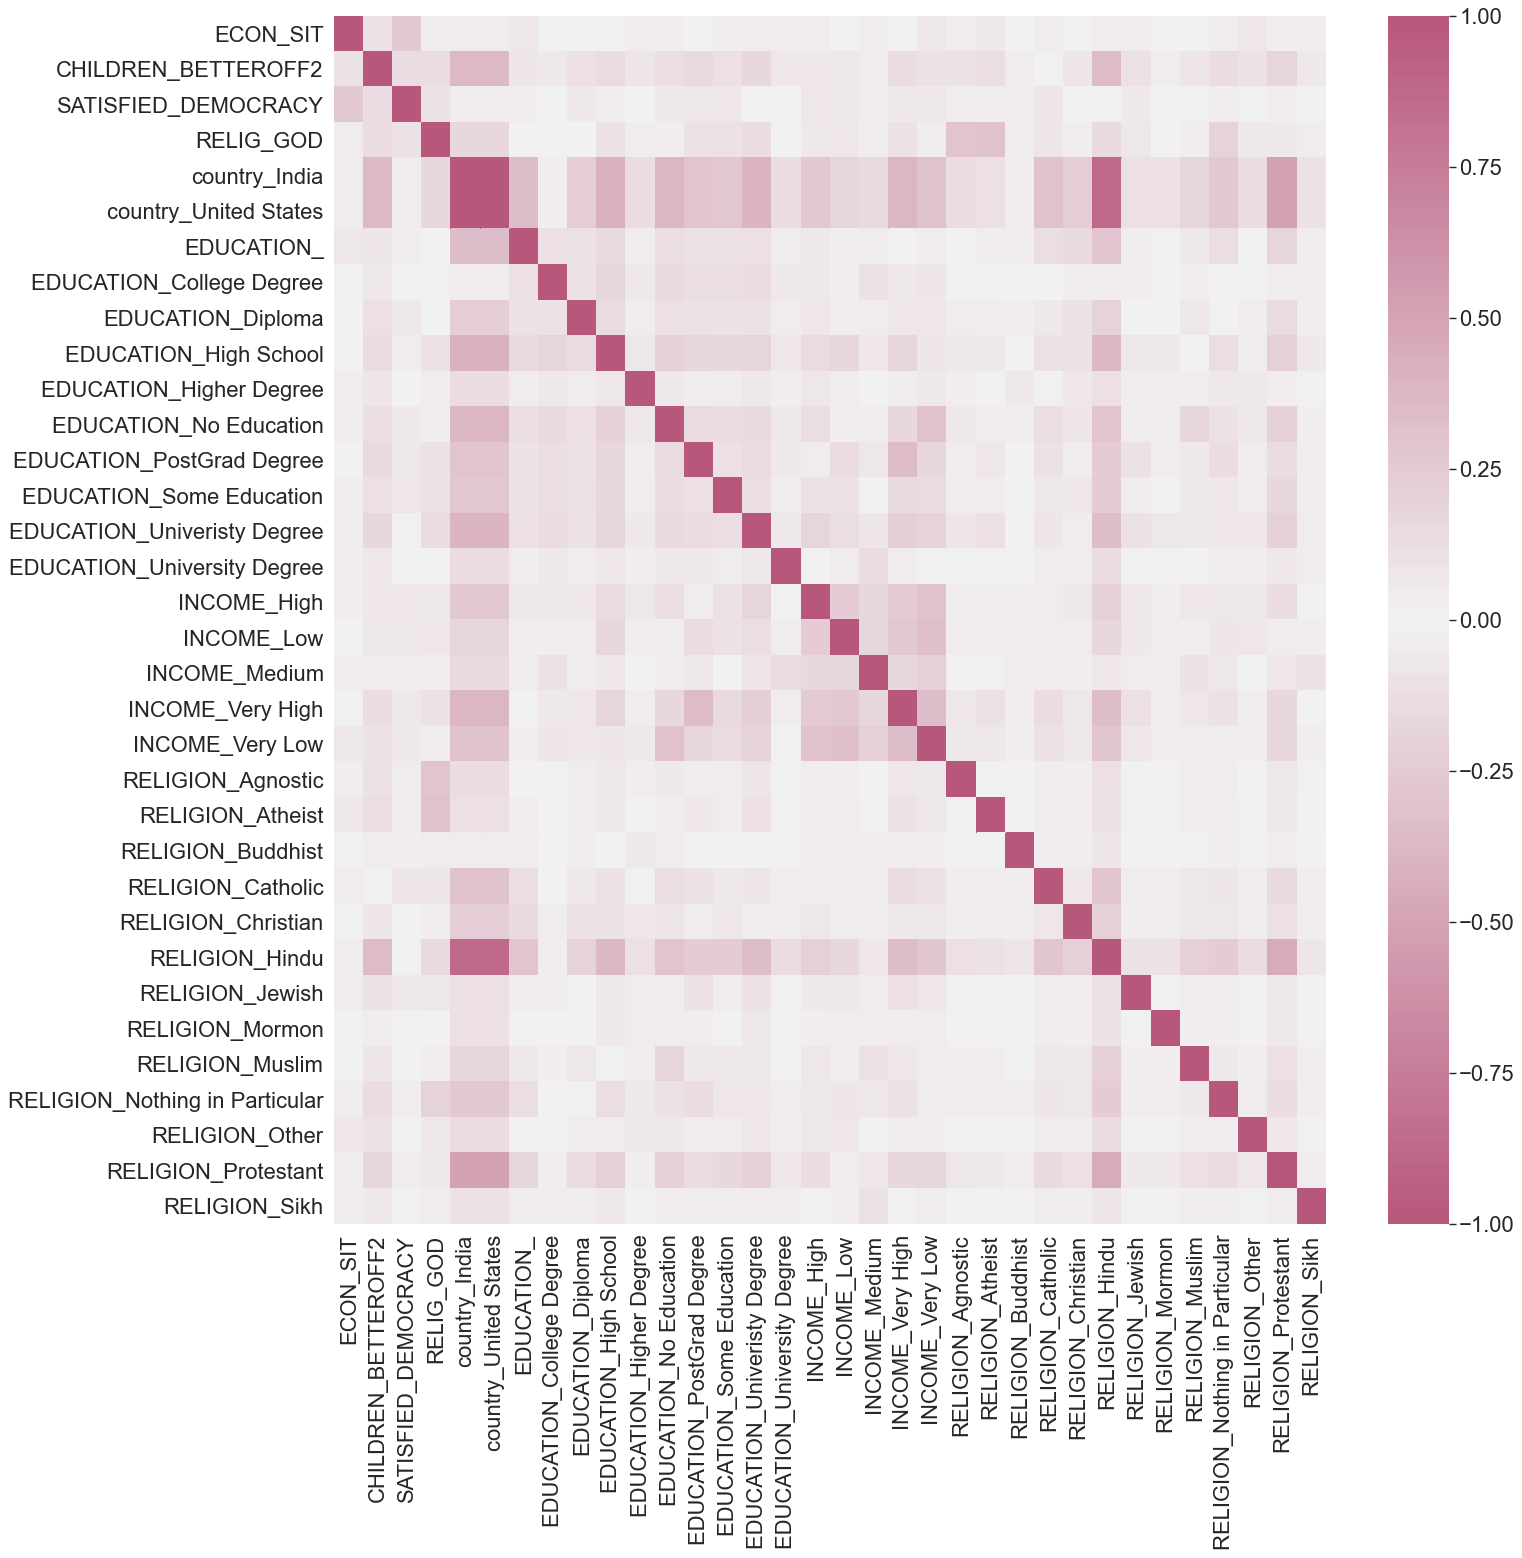

In [37]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
colorMap = sns.diverging_palette(350, 350, s=50, l=50, n=200)
sns.heatmap(X.corr(), cmap = colorMap[::-1])  

#### <br><br> Unsurprisingly there is a strong correlation between the countries. This was to be expected as part of our hypotheses is that there are different attitudes towards homosexuality in countries with collectivist versus individualistic societies, i.e India versus US.
#### <br>This strong correlation has proved why we posed our analytical question. To be able to answer it we need to split the dataset into India and US and fit the models seperately and analyse the strongest predictors for each country.

# Construction of models for each country

We need to split the dataset by country.

In [38]:
# We go back to out df_toanalyse data frame that is not dummy coded or split into X and y.
dfA = df_to_analyse.copy()

We will not create two sub dataframes. One for each country.

In [39]:
# India
dfIND = dfA.loc[dfA['country'] == 'India'] 
dfIND = dfIND.drop(['country'],axis=1) # Dropping the country axis as it's irrelavant now.
dfIND.info()

# US
dfAME = dfA.loc[dfA['country'] == 'United States']
dfAME = dfAME.drop(['country'],axis=1) # Dropping the country axis as it's irrelavant now.
dfAME.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 11278 to 13743
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECON_SIT             675 non-null    float64
 1   CHILDREN_BETTEROFF2  675 non-null    float64
 2   SATISFIED_DEMOCRACY  675 non-null    float64
 3   RELIG_GOD            675 non-null    float64
 4   HOMOSEXUALITY        675 non-null    object 
 5   EDUCATION            675 non-null    object 
 6   INCOME               675 non-null    object 
 7   RELIGION             675 non-null    object 
dtypes: float64(4), object(4)
memory usage: 47.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 36924 to 38424
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ECON_SIT             608 non-null    float64
 1   CHILDREN_BETTEROFF2  608 non-null    float64
 2   SATISFIED_DEMOCRACY  6

## INDIA 

We dummy code our categorical variables and assign 0 and 1 to our target variable. 

In [40]:
dfIND['HOMOSEXUALITY'] = dfIND['HOMOSEXUALITY'].map({'Accept':1,'Not Accept':0})

todummy_list_IND = ['EDUCATION','INCOME','RELIGION']

def dummy_dfIND(dfIND, todummy_list_IND):
    for x in todummy_list_IND:
        dummies_IND = pd.get_dummies(dfIND[x], prefix=x, dummy_na=False)
        dfIND = dfIND.drop(x,1)
        dfIND = pd.concat([dfIND, dummies_IND], axis = 1)
    return dfIND
dfAD_IND = dummy_dfIND(dfIND, todummy_list_IND)

We create dataframe X for our predictors and y for our target variable.

In [41]:
X_IND = dfAD_IND.drop('HOMOSEXUALITY',1)
y_IND = dfAD_IND.HOMOSEXUALITY

In [42]:
# Move target column to the end so when we print coefficients we get the correct pairs!
dfAD_IND = dfAD_IND[ [ col for col in dfAD_IND.columns if col != 'HOMOSEXUALITY' ] + ['HOMOSEXUALITY'] ]

dfAD_IND.shape

(675, 27)

Let's apply the logistic regression method on the India dataset.  

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the date into test and training sets to validate the performance. 
X_train_IND, X_test_IND, y_train_IND, y_test_IND = train_test_split(X_IND, y_IND, test_size = .2, random_state=10)

# Fitting a logistic regression model.
LogReg = LogisticRegression(fit_intercept=0)
LogReg.fit(X_train_IND, y_train_IND)

# Predicting the outcome with our test data. 
y_pred_IND = LogReg.predict(X_test_IND) 

# Printing coefficients for each predictor. 
coefficients_IND = np.column_stack((np.asarray(dfAD_IND.iloc[:,0:26].columns), LogReg.coef_.flatten()))
print(coefficients_IND)

[['ECON_SIT' -0.07933876349138455]
 ['CHILDREN_BETTEROFF2' 0.16238341961507752]
 ['SATISFIED_DEMOCRACY' 0.09774287451702485]
 ['RELIG_GOD' -0.2958710655529219]
 ['EDUCATION_College Degree' -0.4688613299856001]
 ['EDUCATION_Diploma' 0.42473599927448935]
 ['EDUCATION_High School' 0.33052278814328195]
 ['EDUCATION_Higher Degree' -0.34877992544138153]
 ['EDUCATION_No Education' 0.44655607979382506]
 ['EDUCATION_PostGrad Degree' -0.260558439662664]
 ['EDUCATION_Some Education' 0.7123137417771976]
 ['EDUCATION_University Degree' -0.010075369295853509]
 ['INCOME_High' 0.036980445626891595]
 ['INCOME_Low' 0.14990231258181988]
 ['INCOME_Medium' 0.1189215676697176]
 ['INCOME_Very High' 0.42048944881648104]
 ['INCOME_Very Low' 0.09955976990835977]
 ['RELIGION_Buddhist' 0.4684282368207543]
 ['RELIGION_Catholic' -0.24066257174925246]
 ['RELIGION_Christian' 0.0]
 ['RELIGION_Hindu' 0.01751382022938514]
 ['RELIGION_Muslim' 0.03443715847335936]
 ['RELIGION_Nothing in Particular' 0.25046401913293437]
 [

/Users/bobbyhessamian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<br>Let's plot a confusion matrix and print the accuracy, precision, and recall of the fitted model. 

Accuracy: % 56.0
Precision: 0.581081081081081
Recall: 0.5972222222222222


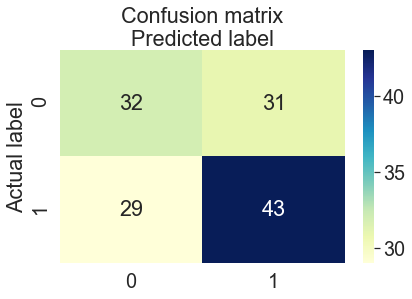

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_IND, y_pred_IND)
class_names=['Not Accept','Accept'] # https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy: %",round(metrics.accuracy_score(y_test_IND, y_pred_IND)*100))
print("Precision:",metrics.precision_score(y_test_IND, y_pred_IND))
print("Recall:",metrics.recall_score(y_test_IND, y_pred_IND))

## USA

Now we do exactly the same fo the US. 

In [45]:
#US:
dfAME['HOMOSEXUALITY'] = dfAME['HOMOSEXUALITY'].map({'Accept':1,'Not Accept':0})

todummy_list_AME = ['EDUCATION','INCOME','RELIGION']

def dummy_dfAME(dfAME, todummy_list_AME):
    for x in todummy_list_AME:
        dummies_AME = pd.get_dummies(dfAME[x], prefix=x, dummy_na=False)
        dfAME = dfAME.drop(x,1)
        dfAME = pd.concat([dfAME, dummies_AME], axis = 1)
    return dfAME
dfAD_AME = dummy_dfAME(dfAME, todummy_list_AME)

In [46]:
X_AME = dfAD_AME.drop('HOMOSEXUALITY',1)
y_AME = dfAD_AME.HOMOSEXUALITY

In [47]:
# Move target column to the end so when we print coefficients we get the correct pairs!
dfAD_AME = dfAD_AME[ [ col for col in dfAD_AME.columns if col != 'HOMOSEXUALITY' ] + ['HOMOSEXUALITY'] ]

dfAD_AME.shape

(608, 30)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting the date into test and training sets to validate the performance. 
X_train_AME, X_test_AME, y_train_AME, y_test_AME = train_test_split(X_AME, y_AME, test_size =.3, random_state=25)

# Fitting a logistic regression model.
LogReg = LogisticRegression(fit_intercept=0)
LogReg.fit(X_train_AME, y_train_AME)

# Predicting the outcome with our test data. 
y_pred_AME = LogReg.predict(X_test_AME) 

# Printing coefficients for each predictor. 
coefficients_AME = np.column_stack((np.asarray(dfAD_AME.iloc[:,0:29].columns), LogReg.coef_.flatten()))
print(coefficients_AME)

[['ECON_SIT' 0.09618802960844758]
 ['CHILDREN_BETTEROFF2' 0.03003148734631156]
 ['SATISFIED_DEMOCRACY' -0.08809998800492953]
 ['RELIG_GOD' 0.03767269222811207]
 ['EDUCATION_' -0.026359552902545335]
 ['EDUCATION_College Degree' 0.13083400379190271]
 ['EDUCATION_Diploma' 0.5620561513266005]
 ['EDUCATION_High School' 0.20709916188271058]
 ['EDUCATION_Higher Degree' 0.2960351635349931]
 ['EDUCATION_PostGrad Degree' 0.5363307699505235]
 ['EDUCATION_Some Education' 0.1610290932405807]
 ['EDUCATION_Univeristy Degree' 0.37617823898247]
 ['INCOME_High' 0.48728526343112805]
 ['INCOME_Low' 0.3720929314916566]
 ['INCOME_Medium' 0.7127465730325644]
 ['INCOME_Very High' 0.8463505855292083]
 ['INCOME_Very Low' -0.17527232367732087]
 ['RELIGION_Agnostic' 0.9554781346665997]
 ['RELIGION_Atheist' 0.9891651276227177]
 ['RELIGION_Buddhist' 0.15445701102414094]
 ['RELIGION_Catholic' 0.23379748664098834]
 ['RELIGION_Christian' -0.7845536207099565]
 ['RELIGION_Hindu' 0.2829401198049871]
 ['RELIGION_Jewish' 0

/Users/bobbyhessamian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: % 73.0
Precision: 0.7440476190476191
Recall: 0.9541984732824428


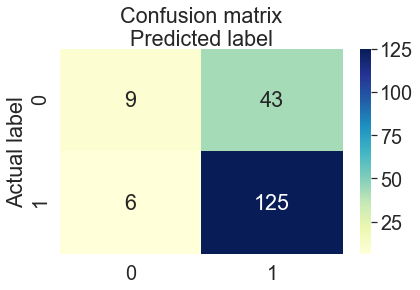

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_AME, y_pred_AME)
class_names=['Not Accept','Accept'] # https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy: %",round(metrics.accuracy_score(y_test_AME, y_pred_AME)*100))
print("Precision:",metrics.precision_score(y_test_AME, y_pred_AME))
print("Recall:",metrics.recall_score(y_test_AME, y_pred_AME))
